In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
df=pd.read_csv("D:\Data Science\Assignments\Assignment #4 Simple Linear Regression\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
df=df.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


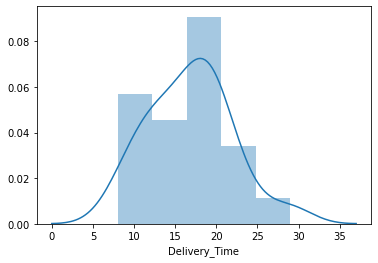

In [11]:
sns.distplot(df["Delivery_Time"])

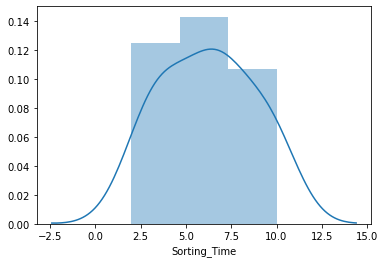

In [13]:
sns.distplot(df["Sorting_Time"])

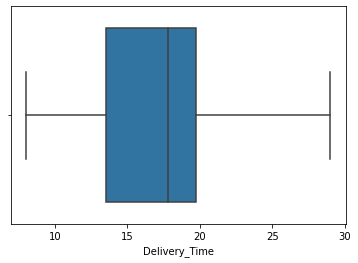

In [14]:
sns.boxplot(df["Delivery_Time"])

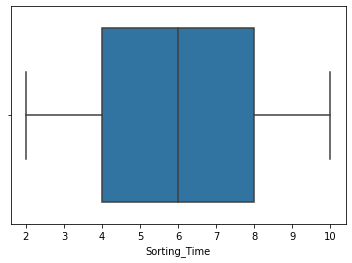

In [15]:
sns.boxplot(df["Sorting_Time"])

In [21]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


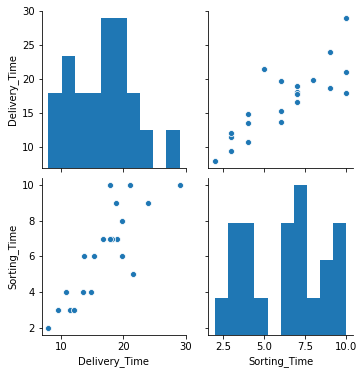

In [22]:
sns.pairplot(df)

# Creating Simple Linear Regression Models

# simple model

In [24]:
simple_model=smf.ols("Delivery_Time~Sorting_Time",data=df).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        21:01:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

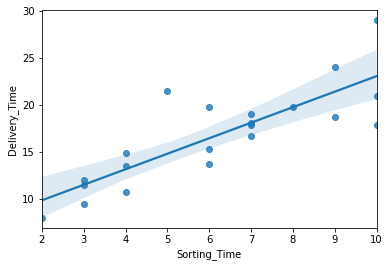

In [25]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=df)

In [27]:
df["log_Delivery_Time"]=np.log(df.Delivery_Time)
df['log_Sorting_Time']=np.log(df.Sorting_Time)

# Logarithmic model

In [28]:
log_model=smf.ols('Delivery_Time~log_Sorting_Time',data=df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        21:05:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_Sorting_Time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

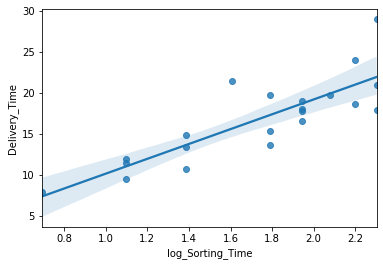

In [29]:
sns.regplot(x="log_Sorting_Time",y="Delivery_Time",data=df)

# Exponetial model

In [30]:
exp_model=smf.ols('log_Delivery_Time~Sorting_Time',data=df).fit()
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           1.59e-06
Time:                        21:06:54   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

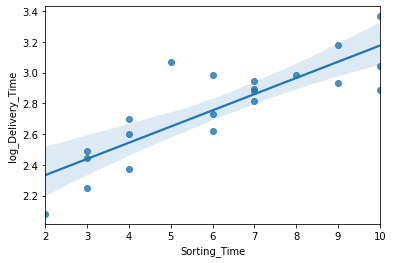

In [31]:
sns.regplot(x="Sorting_Time",y="log_Delivery_Time",data=df)

# Quadratic Model

In [32]:
df['Sorting_Time_sq']=df.Sorting_Time*df.Sorting_Time

In [33]:
quad_model=smf.ols('log_Delivery_Time~Sorting_Time+Sorting_Time_sq',data=df).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_Time   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           2.20e-06
Time:                        21:09:00   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
def RMSE(actual,pred):
    temp=np.sqrt(np.mean((actual-pred)*(actual-pred)))
    return temp

In [35]:
simple_pred=simple_model.predict(df)
simple_rmse=RMSE(df.Delivery_Time,simple_pred)
simple_rmse

2.791650327061766

In [36]:
log_pred=log_model.predict(df)
log_rmse=RMSE(df.Delivery_Time,log_pred)
log_rmse

2.7331714766820663

In [37]:
exp_pred=np.exp(exp_model.predict(df))
exp_rmse=RMSE(df.Delivery_Time,exp_pred)
exp_rmse

2.940250323056201

In [38]:
quad_pred=np.exp(quad_model.predict(df))
quad_rmse=RMSE(df.Delivery_Time,quad_pred)
quad_rmse

2.7990419887409277

In [39]:
dict={'Model':['Simple','Logarithmic','Exponential','Quadratic'],'RMSE':[simple_rmse,log_rmse,exp_rmse,quad_rmse],
      'AIC':[simple_model.aic,log_model.aic,exp_model.aic,quad_model.aic]}
rmse_table=pd.DataFrame(dict)
rmse_table

,Model,RMSE,AIC
0,Simple,2.791650,106.714002
1,Logarithmic,2.733171,105.824850
2,Exponential,2.940250,-11.583930
3,Quadratic,2.799042,-13.919466


In [42]:
df2=pd.read_csv("D:\Data Science\Assignments\Assignment #4 Simple Linear Regression\Salary_Data.csv")
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Delivery_Time      21 non-null     float64
 1   Sorting_Time       21 non-null     int64  
 2   log_Delivery_Time  21 non-null     float64
 3   log_Sorting_Time   21 non-null     float64
 4   Sorting_Time_sq    21 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 968.0 bytes


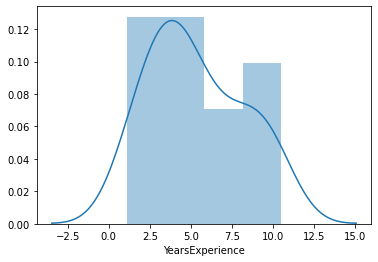

In [44]:
sns.distplot(df2['YearsExperience'])

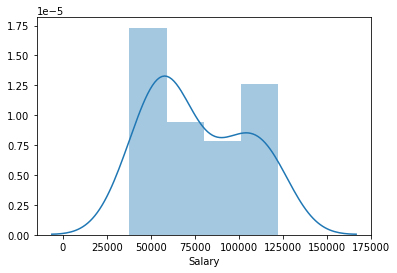

In [45]:
sns.distplot(df2['Salary'])

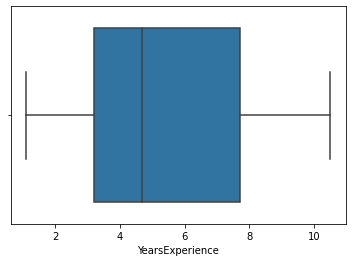

In [46]:
sns.boxplot(df2['YearsExperience'])

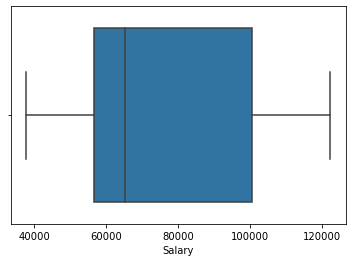

In [47]:
sns.boxplot(df2['Salary'])

In [48]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


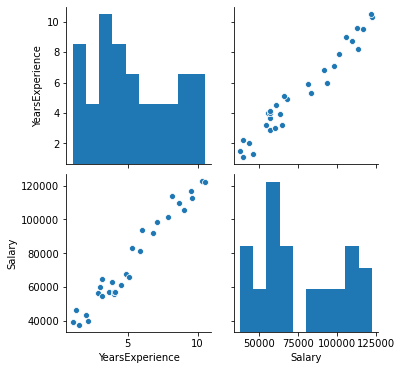

In [49]:
sns.pairplot(df2)

# Simple_Model

In [50]:
model_simple=smf.ols('Salary~YearsExperience',data=df2).fit()
model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           1.14e-20
Time:                        21:42:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

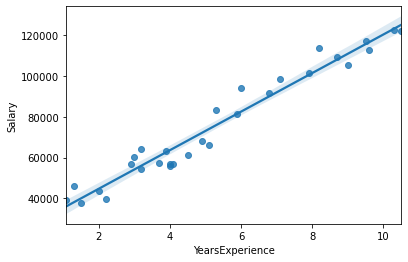

In [51]:
sns.regplot(x="YearsExperience",y="Salary",data=df2)

# Logarithmic_Model

In [52]:
df2["log_YearsExperience"]=np.log(df2.YearsExperience)
df2['log_Salary']=np.log(df2.Salary)

In [53]:
model_log=smf.ols('Salary~log_YearsExperience',data=df2).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           3.25e-13
Time:                        21:44:37   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

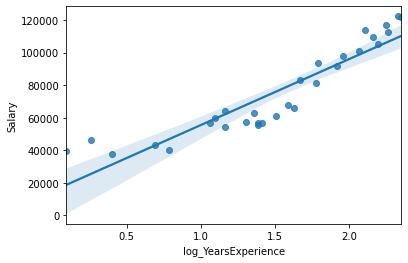

In [54]:
sns.regplot(x="log_YearsExperience",y="Salary",data=df2)

# Exponential_Model

In [55]:
model_exp=smf.ols('log_Salary~YearsExperience',data=df2).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           7.03e-18
Time:                        21:47:03   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

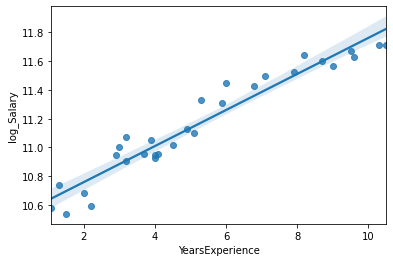

In [56]:
sns.regplot(x="YearsExperience",y="log_Salary",data=df2)

In [57]:
df2['YearsExperience_sq']=df2.YearsExperience*df2.YearsExperience

# Quadratic model

In [58]:
model_quad=smf.ols("Salary~YearsExperience+YearsExperience_sq",data=df2).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           3.59e-19
Time:                        21:49:05   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
pred_simple=model_simple.predict(df2)
simple_rmse2=RMSE(df2.Salary,pred_simple)
simple_rmse2

5592.043608760662

In [60]:
pred_log=model_log.predict(df2)
log_rmse2=RMSE(df2.Salary,log_pred)
log_rmse2

62811.17645299433

In [61]:
pred_exp=np.exp(model_exp.predict(df2))
exp_rmse2=RMSE(df2.Salary,pred_exp)
exp_rmse2

7213.235076620233

In [62]:
pred_quad=np.exp(model_quad.predict(df2))
quad_rmse2=RMSE(df2.Salary,pred_quad)
quad_rmse2

E:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [63]:
dict2={'Model':['Simple','Logarithmic','Exponential','Quadratic'],'RMSE':[simple_rmse2,log_rmse2,exp_rmse2,quad_rmse2],
      'AIC':[model_simple.aic,model_log.aic,model_exp.aic,model_quad.aic]}
rmse_table2=pd.DataFrame(dict2)
rmse_table2

,Model,RMSE,AIC
0,Simple,5.592044e+03,606.882317
1,Logarithmic,6.281118e+04,643.547117
2,Exponential,7.213235e+03,-52.365815
3,Quadratic,inf,608.869417
